In [134]:
print('Hello World')

Hello World


In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [136]:
df_cust = pd.read_csv('datasets/customers.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv')

In [137]:
print("Customers data",df_cust.shape)
print("Credit Score data",df_cs.shape)
print("Transactions data",df_trans.shape)

Customers data (1000, 8)
Credit Score data (1004, 6)
Transactions data (500000, 7)


In [138]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [139]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [140]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [141]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [142]:
df_cust.annual_income.isna().sum()

np.int64(50)

In [143]:
df_cust[df_cust.annual_income.isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [144]:
df_cust.annual_income.median()

np.float64(112218.5)

In [145]:
df_cust.occupation.unique()


array(['Business Owner', 'Consultant', 'Freelancer',
       'Fullstack Developer', 'Accountant', 'Data Scientist', 'Artist'],
      dtype=object)

In [146]:
df_cust[df_cust.occupation == 'Consultant'].annual_income.median()

np.float64(58017.0)

In [147]:
df_cust.groupby('occupation')['annual_income'].median()

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [148]:
occupation_wise_inc_median = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [149]:
occupation_wise_inc_median['Artist']

np.float64(45794.0)

In [150]:
# df_cust['annual_income'] = df_cust.apply(
#    lambda row: occupation_wise_inc_median[row.occupation] if pd.isnull(row.annual_income) else row.annual_income,
#    axis=1
#)

In [151]:
df_cust['annual_income'].fillna(df_cust.occupation.map(occupation_wise_inc_median), inplace=True)

In [152]:
df_cust.iloc[[14,82,97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,261191.5,Married


In [153]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

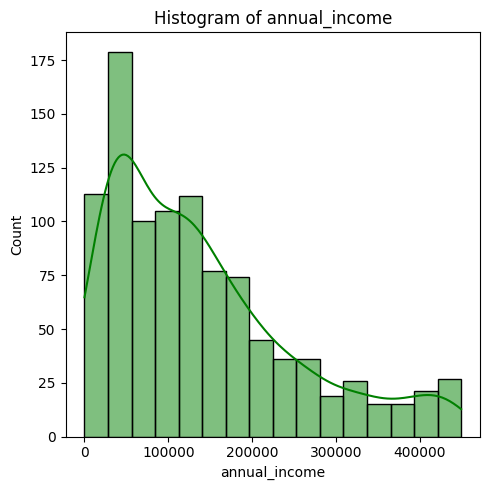

In [154]:
plt.figure(figsize=(5,5))
plt.title('Histogram of annual_income')
sns.histplot(df_cust.annual_income, kde=True, color='green')
plt.tight_layout()
plt.show()

In [155]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [156]:
lower = df_cust['annual_income'].mean() - 3*df_cust['annual_income'].std()
upper = df_cust['annual_income'].mean() + 3*df_cust['annual_income'].std()

lower, upper

(np.float64(-193991.4604300989), np.float64(471824.9914300989))

In [157]:
df_cust[df_cust['annual_income']>upper]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [158]:
## Outlier Treatment for annual_income
outlier100 = df_cust.annual_income<100
df_cust[outlier100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [159]:
## Now we need to replace these values with the occupation_wise_inc_median values

In [160]:
# df_cust.annual_income = df_cust.apply(
#    lambda row: occupation_wise_inc_median[row.occupation] if row.annual_income < 100 else row.annual_income, 
#    axis = 1 
# )

In [161]:
df_cust.loc[outlier100, 'annual_income'] = df_cust.loc[outlier100, 'occupation'].map(occupation_wise_inc_median)

In [162]:
df_cust.annual_income.describe()

count      1000.000000
mean     140483.548500
std      110463.002934
min        5175.000000
25%       49620.500000
50%      115328.000000
75%      195514.250000
max      449346.000000
Name: annual_income, dtype: float64

In [163]:
df_cust.shape

(1000, 8)

In [164]:
df_cust.loc[[31,333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,135759.0,Married


In [165]:
df_cust.groupby('occupation')['annual_income'].median()

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [166]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [167]:
## Outlier Treatment for age

In [168]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [169]:
## Outlier Treatment for age
outliers = df_cust[(df_cust.age<15) | (df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


<Axes: xlabel='age', ylabel='Count'>

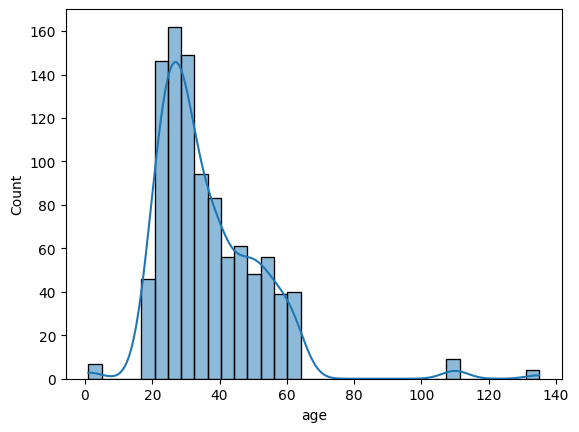

In [170]:
## Before Outlier treament
sns.histplot(df_cust.age, kde=True)

In [171]:
occupation_wise_age_median = df_cust.groupby('occupation')['age'].median().astype(int)
occupation_wise_age_median

occupation
Accountant             31
Artist                 26
Business Owner         51
Consultant             46
Data Scientist         32
Freelancer             24
Fullstack Developer    27
Name: age, dtype: int64

In [172]:
## map() function is faster
outliers_age = (df_cust.age<15) | (df_cust.age>80)
df_cust.loc[outliers_age, 'age'] = df_cust.loc[outliers_age, 'occupation'].map(occupation_wise_age_median)

In [173]:
## Method (OLD)
df_cust.age = df_cust.apply(
    lambda row: occupation_wise_age_median(row.occupation) if (row.age<15) | (row.age>80) else row.age,
    axis = 1
)

In [174]:
df_cust.iloc[[41,165]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,26,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,24,City,Freelancer,39721.0,Single


<Axes: xlabel='age', ylabel='Count'>

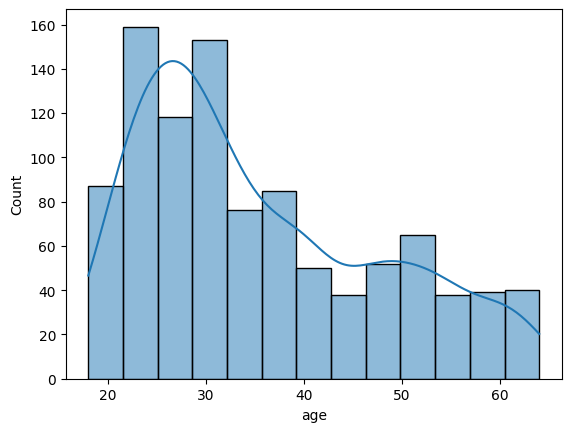

In [175]:
## After outlier treatment
sns.histplot(df_cust.age, kde=True)

Income Visualization

In [176]:
avg_income_per_occupation = df_cust.groupby('occupation')['annual_income'].mean().sort_values()
avg_income_per_occupation

occupation
Artist                  45309.236842
Consultant              60703.154639
Accountant              64123.562500
Freelancer              76327.508772
Fullstack Developer     78727.972973
Data Scientist         137021.266304
Business Owner         268447.368512
Name: annual_income, dtype: float64

In [177]:
avg_income_per_occupation.index, avg_income_per_occupation.values

(Index(['Artist', 'Consultant', 'Accountant', 'Freelancer',
        'Fullstack Developer', 'Data Scientist', 'Business Owner'],
       dtype='object', name='occupation'),
 array([ 45309.23684211,  60703.15463918,  64123.5625    ,  76327.50877193,
         78727.97297297, 137021.26630435, 268447.36851211]))

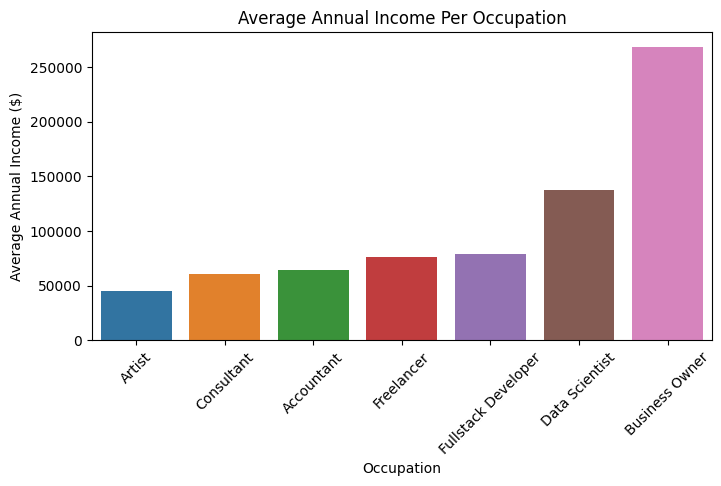

In [178]:
plt.figure(figsize=(8,4))
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette='tab10')
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

In [179]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

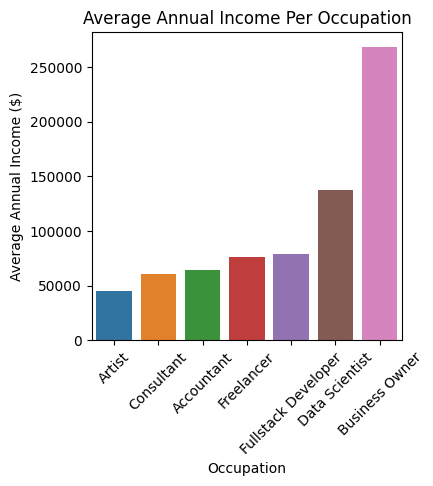

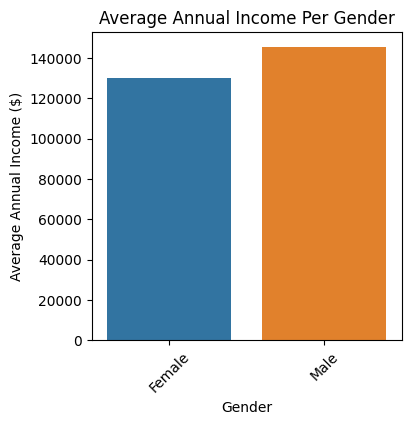

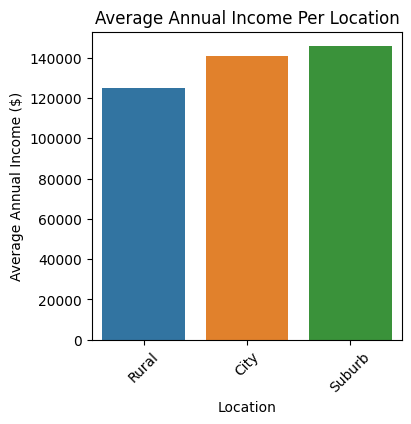

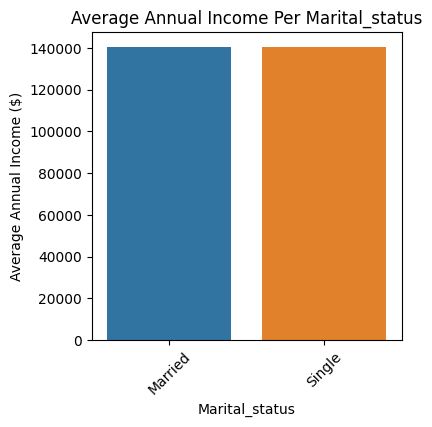

In [180]:
categorical_columns = ['occupation', 'gender', 'location', 'marital_status' ]
for col in categorical_columns:
    average = df_cust.groupby(col)['annual_income'].mean().sort_values()
    plt.figure(figsize=(4,4))
    sns.barplot(x=average.index, y=average.values, palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()
   


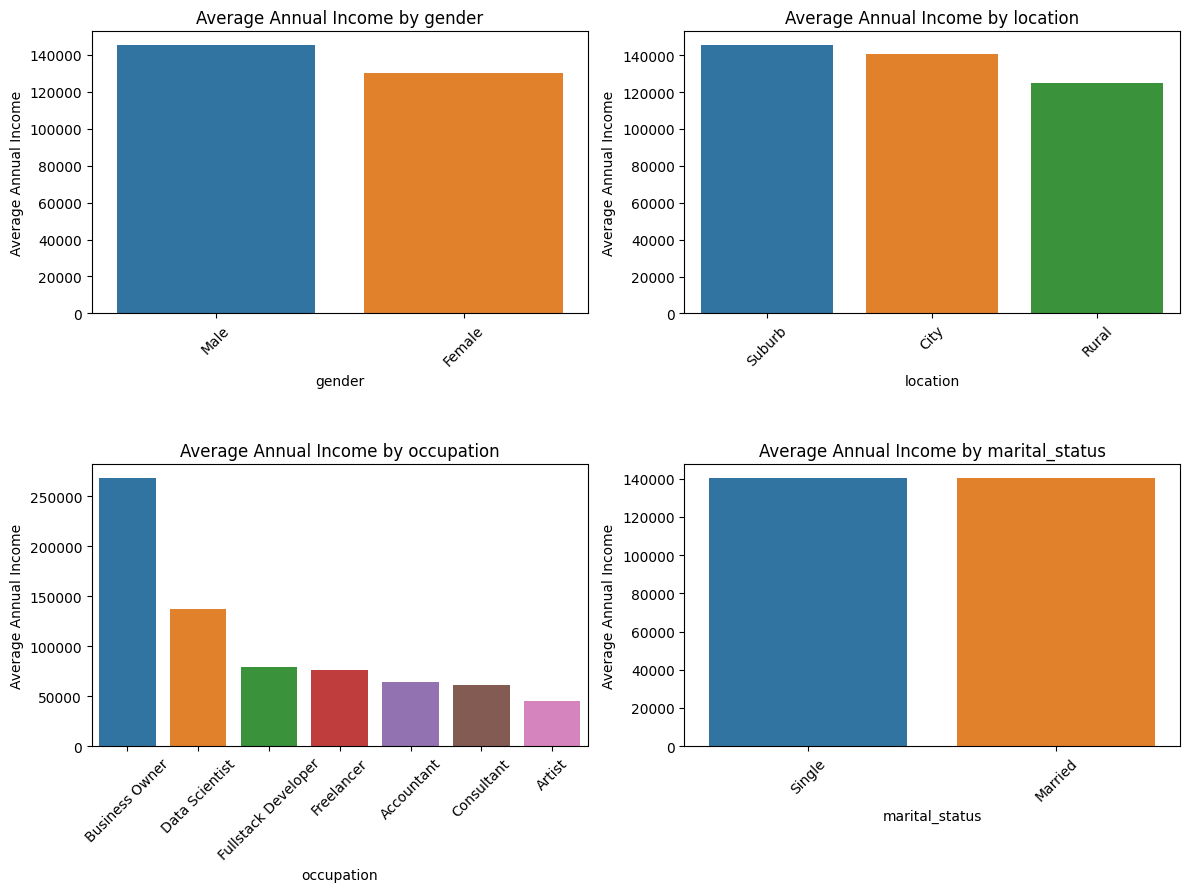

In [181]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [182]:
## Using pd.cut() function to define bins and bin_labels for age
bins = [17, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']
df_cust['age_group'] = pd.cut(df_cust.age, bins=bins, labels=labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [183]:
## .value_counts(): This is a pandas Series method that counts the occurrences of each unique value in a Series.
df_cust.age_group.value_counts() ## gives the absolute value of occurences of that unique value

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

In [184]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100 ## gives the proportion of occurence
age_group_counts, type(age_group_counts)

(age_group
 26-48    56.7
 18-25    24.6
 49-65    18.7
 Name: proportion, dtype: float64,
 pandas.core.series.Series)

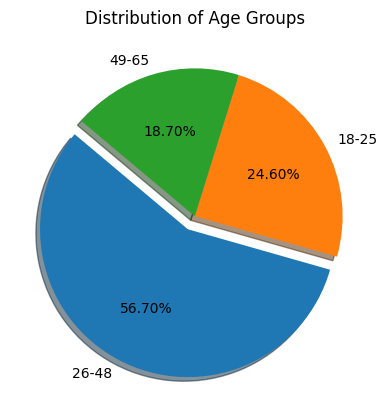

In [185]:
plt.pie(age_group_counts, 
        labels=age_group_counts.index, 
        autopct='%1.2f%%', 
        shadow=True, 
        explode=(0.1,0,0),
        startangle=140)
plt.title('Distribution of Age Groups')
plt.show()

In [186]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [187]:
gender_group_counts = df_cust.gender.value_counts(normalize=True)*100
gender_group_counts

gender
Male      67.4
Female    32.6
Name: proportion, dtype: float64

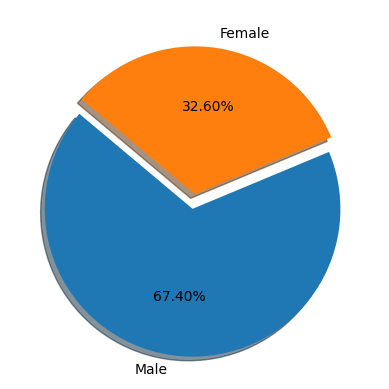

In [188]:
plt.pie(gender_group_counts, 
        labels=gender_group_counts.index, 
        autopct='%1.2f%%', shadow=True, 
        explode=(0.1,0),startangle=140)
plt.show()

.unstack(fill_value=0):

This is a pandas method that pivots the innermost level of a MultiIndex (which is gender in this case) into DataFrames.

fill_value=0: When unstacking, if a combination of location and gender doesn't exist in the original data (meaning a specific location might not have any males or females), unstack() would normally put a NaN (Not a Number) in that cell. 

fill_value=0 tells pandas to replace any such NaN values with 0 instead, making the table cleaner and more interpretable for counts.

In [189]:
## Analyze Gender and Location distribution (Stacked bar chart)

customer_location_gender = df_cust.groupby(['location','gender']).size().unstack(fill_value=0)
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


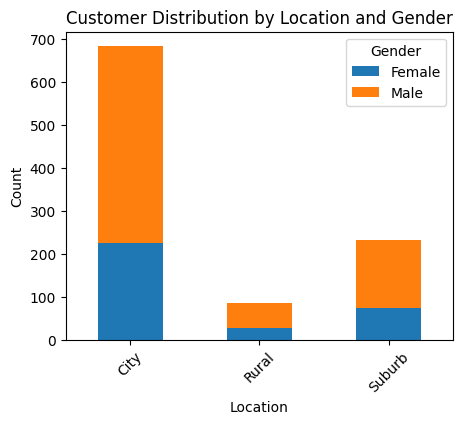

In [190]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Gender', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [191]:
customer_gender_location = df_cust.groupby(['gender','location']).size().unstack(fill_value=0)

<Axes: xlabel='gender'>

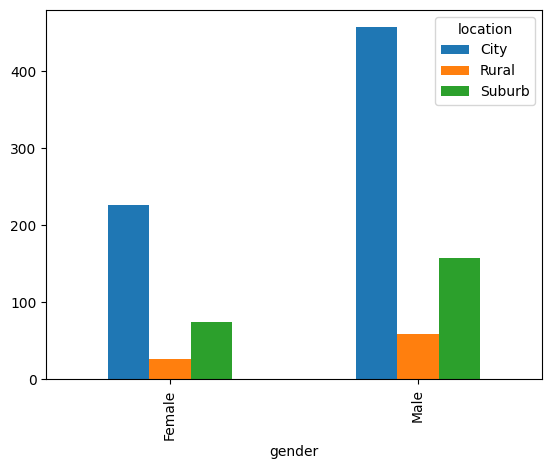

In [192]:
customer_gender_location.plot(kind='bar', stacked=False)

<Axes: xlabel='gender'>

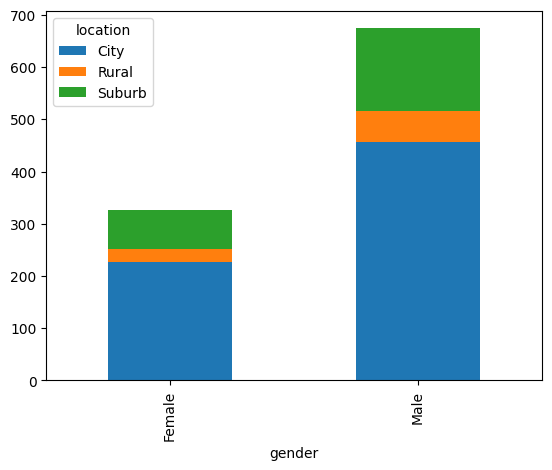

In [193]:
customer_gender_location.plot(kind='bar', stacked=True)

<h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [194]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [195]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [196]:
df_cs.cust_id.nunique()

1000

In [197]:
df_cs.cust_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
999     False
1000    False
1001    False
1002    False
1003    False
Name: cust_id, Length: 1004, dtype: bool

In [198]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [199]:
df_cs_clean_1 = df_cs.drop_duplicates(subset='cust_id', keep='last')
df_cs_clean_1.shape

(1000, 6)

In [200]:
df_cs_clean_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19235.561497
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1250.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [201]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [202]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [203]:
print(df_cs_clean_1.credit_limit.value_counts())

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64


In [204]:
credit_score_median_by_limit = df_cs_clean_1.groupby('credit_limit')['credit_score'].median()
credit_score_median_by_limit

credit_limit
500.0      380.0
750.0      478.5
1000.0     528.0
1250.0     576.0
1500.0     625.0
20000.0    673.5
40000.0    732.0
60000.0    774.5
Name: credit_score, dtype: float64

In [205]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN


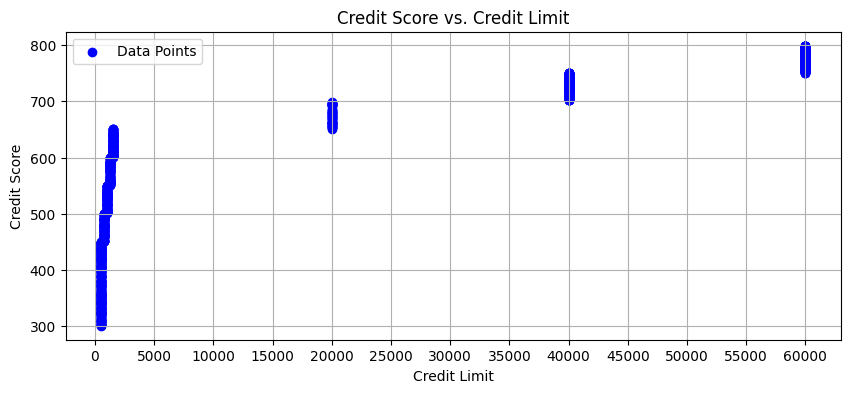

In [206]:
# Looking at scatter plot for credit score vs credit_limit 
# Create a scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(df_cs_clean_1['credit_limit'], df_cs_clean_1['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 5000
plt.xticks(range(0, 60001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [207]:
bins = [300, 450, 500, 550, 600, 650, 700, 750, 800]
labels = [f'{start}-{end-1}' for start, end in zip(bins, bins[1:])]
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1.credit_score, 
                                             bins=bins, 
                                             labels=labels, 
                                             include_lowest=True, 
                                             right=False) ## right exclusive , [a,b)
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [208]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749
...,...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN,450-499
931,928,311,0.832244,316.0,2.0,NaN,300-449
948,945,526,0.272734,227.0,1.0,NaN,500-549
954,951,513,0.175914,131.0,3.0,NaN,500-549


df_cs_clean_1.credit_limit =df_cs_clean_1.apply(
                                lambda row: credit_limit_median[row.credit_score_range]
                                if pd.isna(row.credit_limit) 
                                else row.credit_limit, 
                                axis = 1 
)

In [271]:
df_cs_clean_2 = df_cs_clean_1.copy()
credit_limit_mode = df_cs_clean_2.groupby('credit_score_range')['credit_limit'].transform(lambda x: x.mode().iloc[0])
df_cs_clean_2['credit_limit'].fillna(credit_limit_mode, inplace=True)
df_cs_clean_2.isnull().sum()
credit_limit_mode.shape

(1000,)

In [210]:
##df_cs_clean_2 = df_cs_clean_1.copy()
##credit_limit_mode = df_cs_clean_2.groupby('credit_score_range')['credit_limit'].apply(lambda x: x.mode()[0])
##df_cs_clean_2['credit_limit'].fillna(df_cs_clean_2['credit_score_range'].map(credit_limit_mode), inplace=True)
##df_cs_clean_2.isnull().sum()

In [211]:
df_cs_clean_2.iloc[[10,37]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,20000.0,650-699
37,38,514,0.296971,238.0,2.0,1000.0,500-549


### Data Cleaning Step 3: Handle Outliers: outstanding_debt


In [212]:
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


<Axes: ylabel='outstanding_debt'>

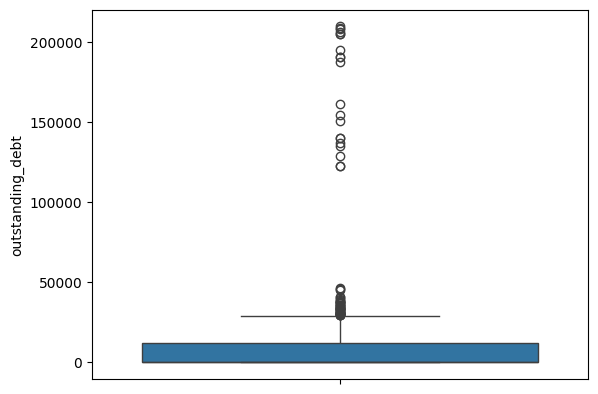

In [213]:
sns.boxplot(df_cs_clean_2.outstanding_debt) ## Boxplot used IQR range rule for detecting outliers

In [214]:
## outstanding_debt (max) is v.v. high we need to verify it
df_cs_clean_2[df_cs_clean_2.outstanding_debt > df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


In [215]:
df_cs_clean_2.loc[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit, 'outstanding_debt'] = df_cs_clean_2['credit_limit']

In [216]:
df_cs_clean_2.loc[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [217]:
df_cs_clean_2.loc[[1, 19]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
19,20,647,0.439132,1500.0,3.0,1500.0,600-649


In [218]:
df_cs_clean_2[['credit_score', 'credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [219]:
df_merged = df_cust.merge(df_cs_clean_2, on='cust_id', how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [220]:
df_merged.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range'],
      dtype='object')

In [221]:
numerical_columns = ['credit_score',
       'credit_utilisation', 'outstanding_debt','credit_limit', 'annual_income', 'age']
correlation_matrix = df_merged[numerical_columns].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444961
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027828
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444375
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.511091
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619103
age,0.444961,-0.027828,0.444375,0.511091,0.619103,1.000000


<Axes: >

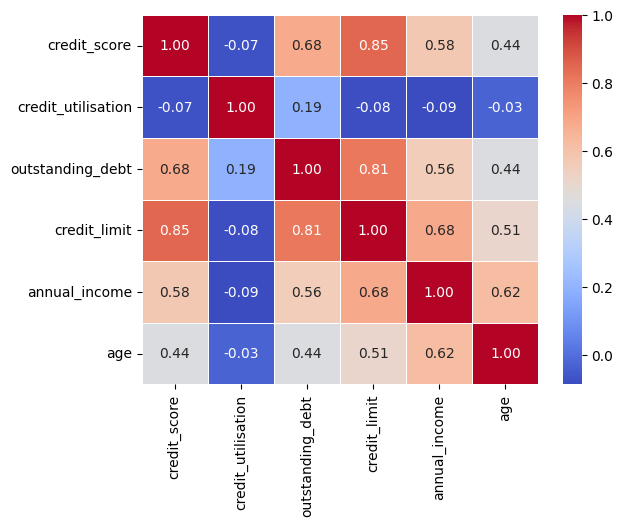

In [222]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Transactions

In [223]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [224]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [225]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [226]:
df_trans[df_trans.platform.isnull()].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe


In [227]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [228]:
df_trans.loc[(df_trans.tran_amount>500) & (df_trans.payment_type=='Credit Card')].count()

tran_id             26542
cust_id             26542
tran_date           26542
tran_amount         26542
platform            26293
product_category    26542
payment_type        26542
dtype: int64

In [229]:
df_trans.groupby(['platform'])['tran_amount'].median()

platform
Alibaba     143.0
Amazon      135.0
Cred        145.0
Ebay        142.0
Flipkart    142.0
Meesho      142.0
Shopify     143.0
Name: tran_amount, dtype: float64

In [230]:
df_merged_2 = df_merged.merge(df_trans, on='cust_id', how='inner')
pd.set_option('display.max_columns', None)
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37,Flipkart,Fashion & Apparel,Credit Card


In [231]:
df_trans.groupby(['platform'])['product_category'].value_counts(normalize=True)*100

platform  product_category      
Alibaba   Electronics               26.102142
          Fashion & Apparel         23.337954
          Kitchen Appliances        11.691400
          Beauty & Personal Care    11.517449
          Sports                     9.983149
                                      ...    
Shopify   Sports                    10.016237
          Home Decor                 7.968845
          Garden & Outdoor           4.589507
          Books                      2.930282
          Toys & Games               1.920540
Name: proportion, Length: 63, dtype: float64

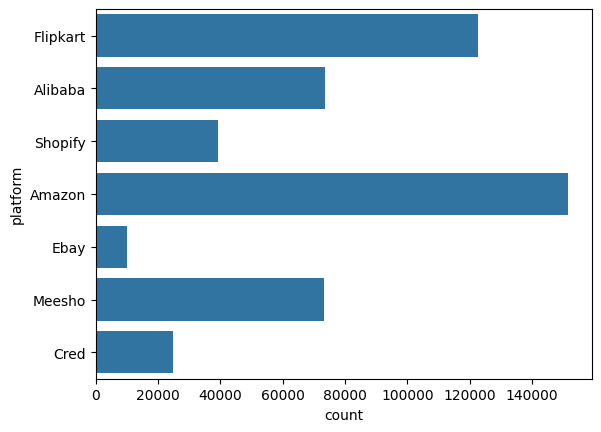

In [232]:
sns.countplot(y='platform', data=df_trans)
plt.show()

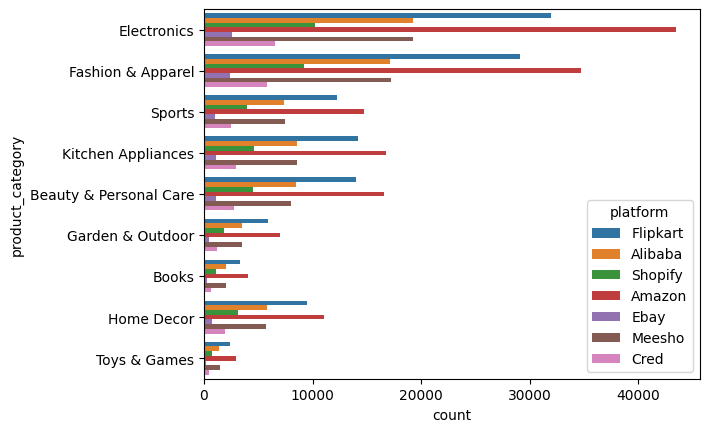

In [233]:
sns.countplot(y='product_category', data=df_trans, hue='platform')
plt.show()

In [234]:
df_trans.platform.mode()[0] ## Mode is used as it a string

'Amazon'

In [235]:
df_trans.platform.fillna(df_trans.platform.mode()[0], inplace=True)

In [236]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [237]:
df_trans.tran_amount.describe()

count    500000.00000
mean       3225.20733
std       13098.74276
min           0.00000
25%          64.00000
50%         141.00000
75%         397.00000
max       69999.00000
Name: tran_amount, dtype: float64

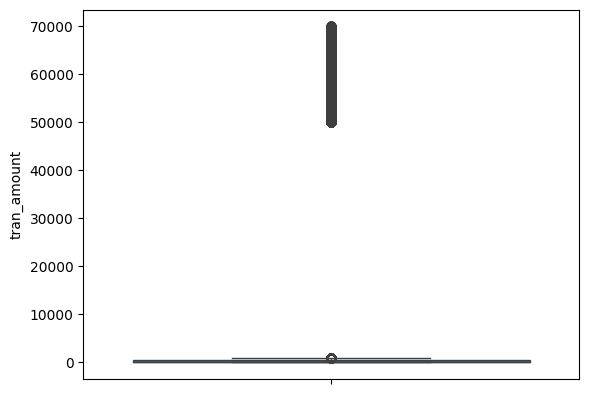

In [238]:
sns.boxplot(df_trans.tran_amount)
plt.show()

In [239]:
print(df_trans.tran_amount.min())
## There we need to set these 0 value orders to a feasible value

0


In [240]:
## Lets analyze the column which have these 0 tran_amount orders
df_trans[df_trans.tran_amount==0].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [241]:
df_trans[df_trans.tran_amount==0].shape

(4734, 7)

In [242]:
## So 4734 points are 0
## Lets observe platform and product_category
df_trans[(df_trans.tran_amount==0)&(df_trans.platform=='Amazon')&(df_trans.product_category=='Electronics')&(df_trans.payment_type=='Credit Card')].shape


(4734, 7)

In [243]:
## Lets search more combination of SAME type and maybe take Median?
df_trans[(df_trans.tran_amount>0)&(df_trans.platform=='Amazon')&(df_trans.product_category=='Electronics')&(df_trans.payment_type=='Credit Card')].shape

## So for df_trans.tran_amount>0, there are 10903 more such combinations

(10903, 7)

In [244]:
median_to_replace = df_trans[(df_trans.tran_amount>0)
               &(df_trans.platform=='Amazon')
               &(df_trans.product_category=='Electronics') 
               &(df_trans.payment_type=='Credit Card')]['tran_amount'].median()
print(median_to_replace)
## Hence median value of 554.0 must be replaced with 0 values

554.0


In [245]:
df_trans_1 = df_trans.copy()
df_trans_1.tran_amount.replace(0,median_to_replace, inplace=True)  
## .replace(what, value, inplace) is used as only one such value is to be replace is all the columns

In [246]:
df_trans_1.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

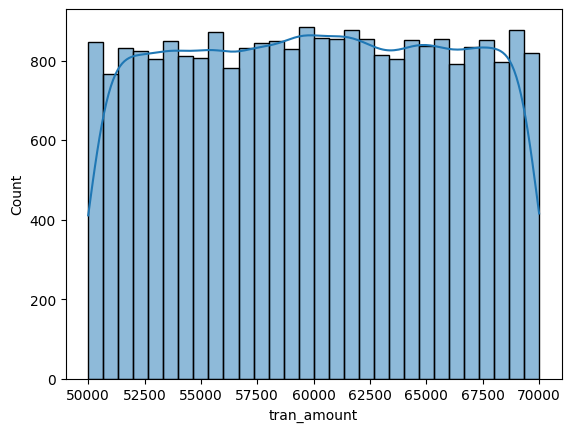

In [247]:
sns.histplot(df_trans_1[df_trans_1.tran_amount>10000].tran_amount, kde=True, bins=30)

<Axes: xlabel='tran_amount', ylabel='Count'>

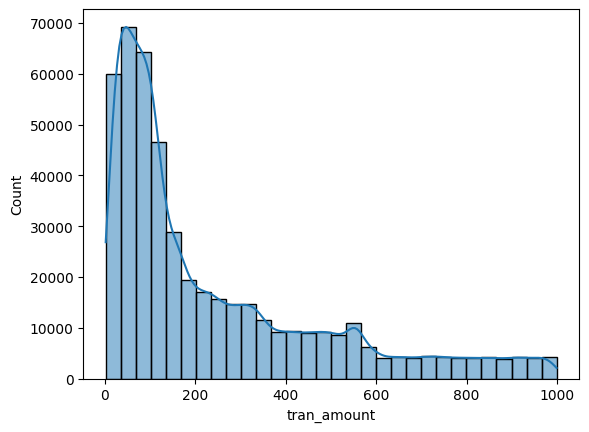

In [248]:
sns.histplot(df_trans_1[df_trans_1.tran_amount<1001].tran_amount, kde=True, bins = 30)

In [249]:
## Outlier Removal - IQR method
## As distribution is not a normal, we can't use std dev method

Q1, Q3 = df_trans_1.tran_amount.quantile([0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - 2*IQR ## 2 is used instead of 1.5 as per business requirements
upper = Q3 + 2*IQR 
lower, upper

(-628.0, 1107.0)

In [250]:
df_trans_outliers = df_trans_1[df_trans_1.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [251]:
df_trans_outliers.shape

(25000, 7)

In [252]:
# True Trans value after removing outliers
df_trans_2 = df_trans_1[df_trans_1.tran_amount<upper]

In [253]:
product_category_mean = df_trans_2.groupby('product_category')['tran_amount'].mean()
product_category_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

Create the boolean mask, same as before

is_outlier = df_trans_1.index.isin(df_trans_outliers.index)

Create a Series of the replacement values by mapping the categories to their means

Note: We map on the original df_trans_1 column here

replacement_values = df_trans_1['product_category'].map(product_category_mean)

Use .mask() to replace values in 'tran_amount' where the condition (is_outlier) is True

df_trans_1['tran_amount'] = df_trans_1['tran_amount'].mask(is_outlier, replacement_values)


In [254]:
df_trans_1.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(product_category_mean)

<Axes: xlabel='tran_amount', ylabel='Count'>

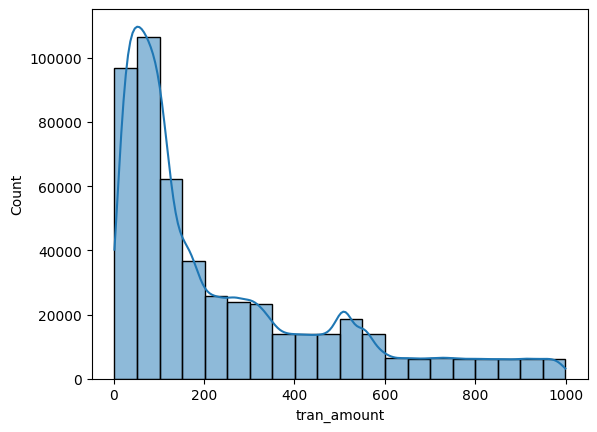

In [255]:
sns.histplot(df_trans_1.tran_amount, kde=True, bins = 20)

In [256]:
df_trans_1[df_trans_1.tran_amount>upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [257]:
df_trans_1.loc[[26, 104]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay


In [258]:
pd.set_option('display.max_columns', None)
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37,Flipkart,Fashion & Apparel,Credit Card


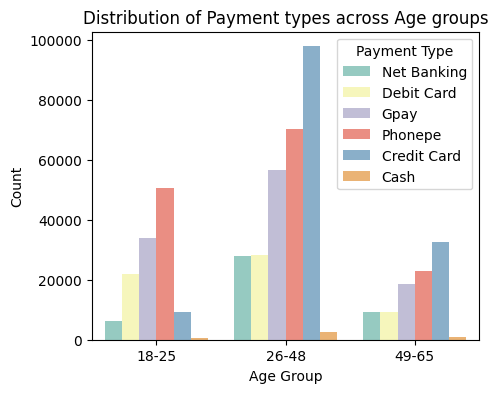

In [259]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

## From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

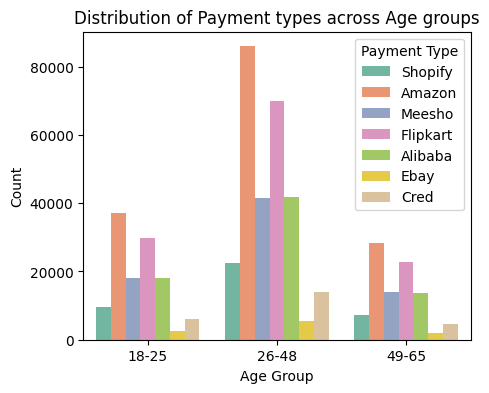

In [260]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='platform', data=df_merged_2, palette='Set2')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

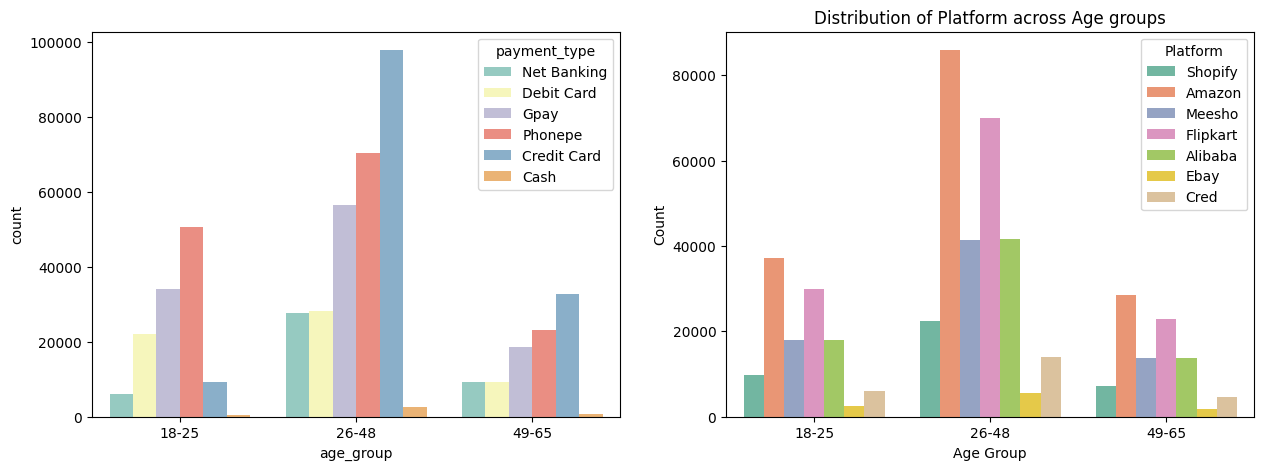

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # fig - entire frame, (ax1 ,ax2) - individual axes objects (Tuple unpacking)

sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3', ax=ax1)
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

sns.countplot(x='age_group', hue='platform', data=df_merged_2, palette='Set2', ax=ax2)
plt.title('Distribution of Platform across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Platform', loc='upper right')
plt.show()

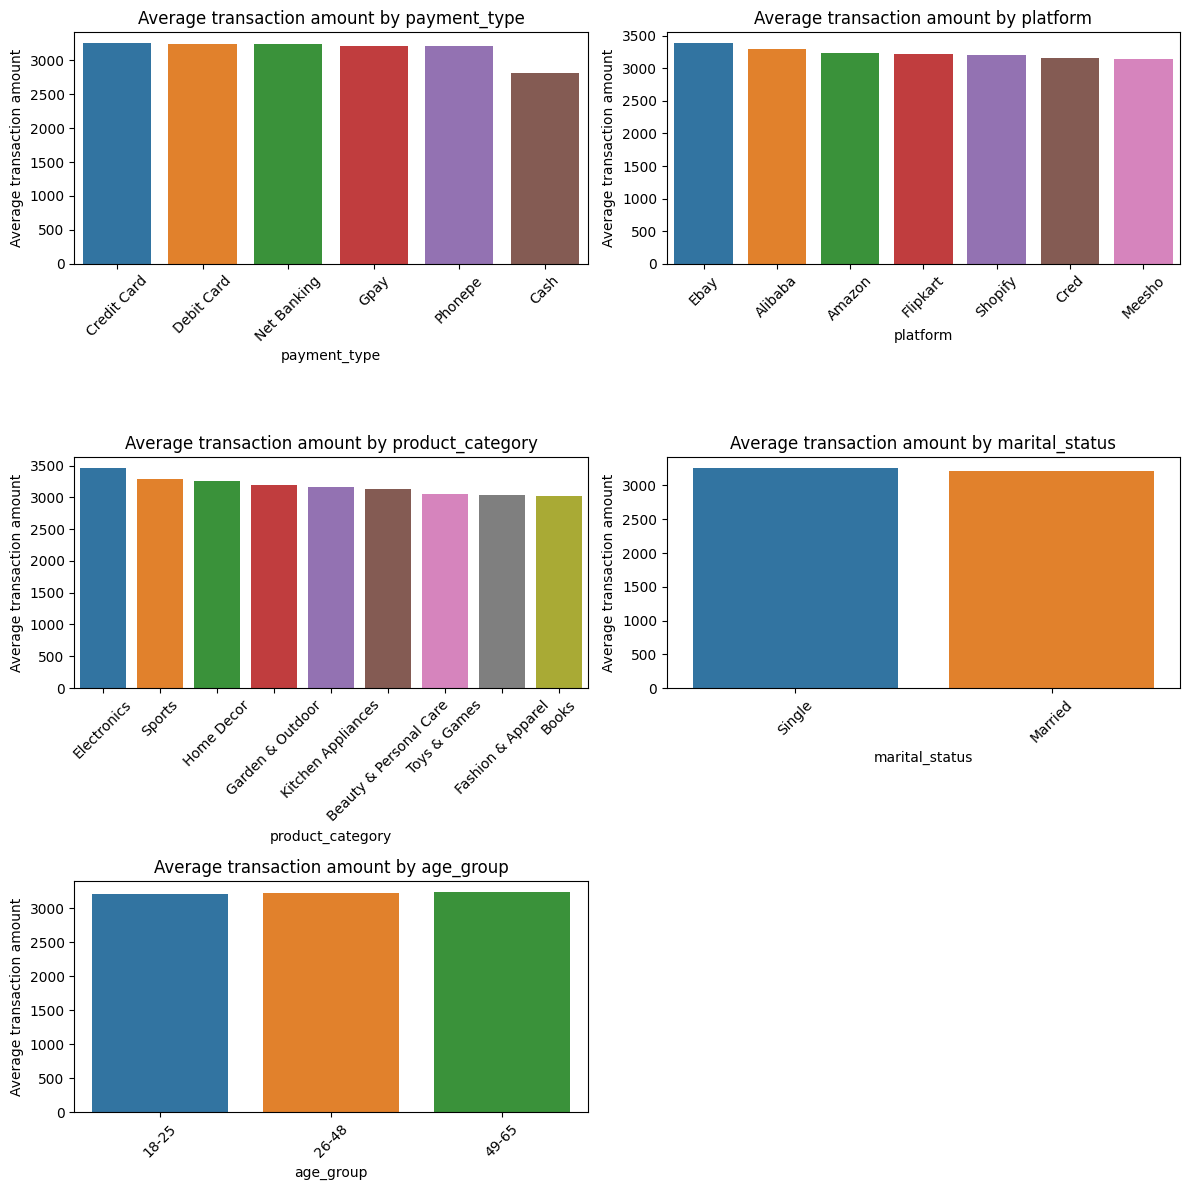

In [262]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [263]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged_2.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37138.181054,1137.024545,484.708344
1,26-48,146092.690672,20610.301607,597.918043
2,49-65,260430.658253,41781.734465,701.876810


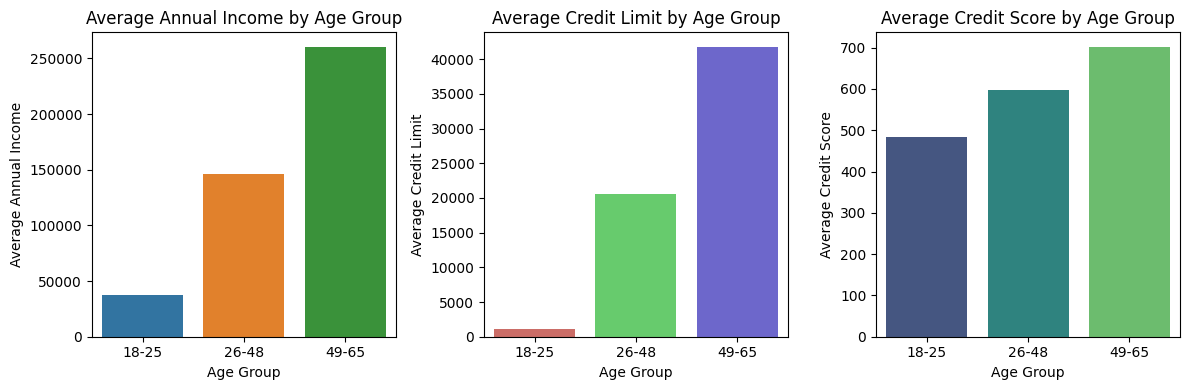

In [264]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care